In [1]:
import pandas as pd
import numpy as np
from pydataset import data
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import viz

In [2]:
# 1. Load the tips dataset from either pydataset or seaborn.
df = data('tips')

In [3]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
# 2. Fit a linear regression model (ordinary least squares) and compute yhat, predictions of tip using total_bill.
from statsmodels.formula.api import ols
model = ols('tip ~ total_bill', df).fit()
df['yhat'] = model.predict(df.total_bill)

In [5]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,yhat
1,16.99,1.01,Female,No,Sun,Dinner,2,2.704636
2,10.34,1.66,Male,No,Sun,Dinner,3,2.006223
3,21.01,3.50,Male,No,Sun,Dinner,3,3.126835
4,23.68,3.31,Male,No,Sun,Dinner,2,3.407250
5,24.59,3.61,Female,No,Sun,Dinner,4,3.502822


In [6]:
df['residuals'] = df.tip - df.yhat
df.head(3)

,total_bill,tip,sex,smoker,day,time,size,yhat,residuals
1,16.99,1.01,Female,No,Sun,Dinner,2,2.704636,-1.694636
2,10.34,1.66,Male,No,Sun,Dinner,3,2.006223,-0.346223
3,21.01,3.50,Male,No,Sun,Dinner,3,3.126835,0.373165


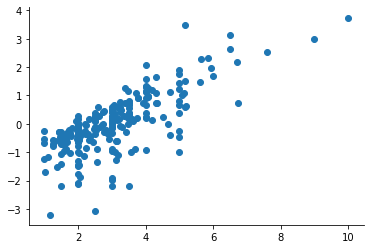

In [7]:
# 3. Plot the residuals for the linear regression model that you made.
plt.scatter(df.tip, df.residuals)

In [8]:
from scipy import stats
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [9]:
# question 4 and 5
df['yhat_baseline'] = df['tip'].mean()
df['residual_baseline'] = df['tip'] - df['yhat_baseline'] 

In [10]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,yhat,residuals,yhat_baseline,residual_baseline
1,16.99,1.01,Female,No,Sun,Dinner,2,2.704636,-1.694636,2.998279,-1.988279
2,10.34,1.66,Male,No,Sun,Dinner,3,2.006223,-0.346223,2.998279,-1.338279
3,21.01,3.50,Male,No,Sun,Dinner,3,3.126835,0.373165,2.998279,0.501721
4,23.68,3.31,Male,No,Sun,Dinner,2,3.407250,-0.097250,2.998279,0.311721
5,24.59,3.61,Female,No,Sun,Dinner,4,3.502822,0.107178,2.998279,0.611721


In [11]:
df['residual^2'] = df.residuals ** 2

df['residual_baseline^2'] = df.residual_baseline ** 2

df.head(3)

,total_bill,tip,sex,smoker,day,time,size,yhat,residuals,yhat_baseline,residual_baseline,residual^2,residual_baseline^2
1,16.99,1.01,Female,No,Sun,Dinner,2,2.704636,-1.694636,2.998279,-1.988279,2.871792,3.953252
2,10.34,1.66,Male,No,Sun,Dinner,3,2.006223,-0.346223,2.998279,-1.338279,0.119870,1.790990
3,21.01,3.50,Male,No,Sun,Dinner,3,3.126835,0.373165,2.998279,0.501721,0.139252,0.251724


In [12]:
SSE = sum(df['residual^2'])
SSE_baseline = sum(df['residual_baseline^2'])

print("SSE = ", SSE)
print("SSE_baseline = ", SSE_baseline)

SSE =  252.78874385077603
SSE_baseline =  465.21247704918085


In [13]:
MSE = SSE/len(df)
MSE_baseline = SSE_baseline/len(df)

print("MSE = ", MSE)
print("MSE baseline = ", MSE_baseline)


MSE =  1.036019442011377
MSE baseline =  1.9066085124966428


In [14]:
RMSE = sqrt(MSE)
RMSE_baseline = sqrt(MSE_baseline)

print("RMSE = ", RMSE)
print("RMSE baseline = ", RMSE_baseline)

RMSE =  1.0178504025697377
RMSE baseline =  1.3807999538298958


In [15]:
ESS = sum((df.yhat - df.tip.mean())**2)

In [16]:
ESS

212.4237331984042

In [17]:
TSS = ESS + SSE
TSS

465.2124770491802

In [18]:
# question 6
def better_than_baseline():
    if SSE < SSE_baseline:
        print('model performs better than the baseline model')
    else:
        print('model performs not better than the baseline model')

In [19]:
better_than_baseline()

model performs better than the baseline model


In [20]:
# 7
r2 = model.rsquared
print('R-squared = ', round(r2,3))

R-squared =  0.457


In [21]:
y = df.tip
evs = explained_variance_score(y, df.yhat)
print('Explained Variance = ', round(evs,3))

Explained Variance =  0.457


In [22]:
# 8 Is your model significantly better than the baseline model
f_pval = model.f_pvalue

print("p-value for model significance = ", round(f_pval,4))

p-value for model significance =  0.0


Since p_value is much less than 0.05, it can conclude that your regression model fits the data better than the model with no independent variables, meaning the independent variables in your model improve the fit.

In [23]:
df.head(3)

,total_bill,tip,sex,smoker,day,time,size,yhat,residuals,yhat_baseline,residual_baseline,residual^2,residual_baseline^2
1,16.99,1.01,Female,No,Sun,Dinner,2,2.704636,-1.694636,2.998279,-1.988279,2.871792,3.953252
2,10.34,1.66,Male,No,Sun,Dinner,3,2.006223,-0.346223,2.998279,-1.338279,0.119870,1.790990
3,21.01,3.50,Male,No,Sun,Dinner,3,3.126835,0.373165,2.998279,0.501721,0.139252,0.251724


In [24]:
df.tip.size

244

In [25]:
def plot_residuals(y, yhat):
    return plt.scatter(y, y - yhat)

In [26]:
def regression_errors(y, yhat):
    '''
    Returns a dictionary containing various regression error metrics.
    '''
    n = y.size
    residuals = yhat - y
    ybar = y.mean()

    sse = sum(residuals**2)

    ess = sum((yhat - ybar)**2)

    return {'sse': sse,
        'mse': sse / n,
        'rmse': sqrt(sse / n),
        'ess': ess,
        'tss': ess + sse,}

In [27]:
y = df.tip
yhat = df.yhat
regression_errors(y, yhat)

{'sse': 252.78874385077603,
 'mse': 1.036019442011377,
 'rmse': 1.0178504025697377,
 'ess': 212.4237331984042,
 'tss': 465.2124770491802}

In [28]:
def baseline_mean_errors(y):
    '''
    Returns a dictionary containing various regression error metrics for a
    baseline model which is a model that uses the mean of y as the prediction.
    '''
    baseline_yhat = y.mean()
    n = y.size
    residuals = y - baseline_yhat

    sse = sum(residuals**2)

    return {'sse': sse,
        'mse': sse / n,
        'rmse': sqrt(sse / n),}

In [29]:
y = df.tip
baseline_mean_errors(y)

{'sse': 465.21247704918085,
 'mse': 1.9066085124966428,
 'rmse': 1.3807999538298958}

In [30]:
def better_than_baseline(y, yhat):
    sse_baseline = baseline_mean_errors(y)['sse']
    sse_model = regression_errors(y, yhat)['sse']
    return sse_model < sse_baseline

In [31]:
y = df.tip
better_than_baseline(y, yhat)


True

In [32]:
def model_significance(model):
    '''
    Given a fitted OLS model from statsmodels, return the model's explained
    variance, and the p-value indicating whether the relationship is statistically significant.
    '''
    return {'r^2': model.rsquared, 'f p-value': model.f_pvalue}

In [33]:
model_significance(model)

{'r^2': 0.45661658635167646, 'f p-value': 6.692470646863376e-34}

# mpg

In [34]:
mpg = data('mpg')

In [35]:
# x = displ
# y = hwy
model = ols('hwy ~ displ', mpg).fit()
mpg['yhat'] = model.predict()

In [36]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,yhat
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,29.342591
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,29.342591
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,28.636473
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,28.636473
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,25.812002


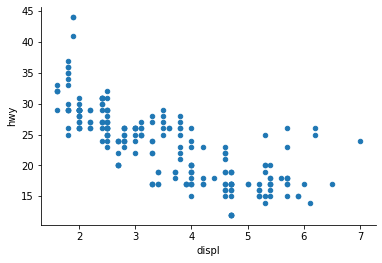

In [37]:
mpg.plot.scatter(y='hwy', x='displ')

In [38]:
y = mpg.hwy
yhat = mpg.yhat
better_than_baseline(y, yhat)

True

In [39]:
regression_errors(y, yhat)

{'sse': 3413.829008995462,
 'mse': 14.589012858954966,
 'rmse': 3.8195566312014497,
 'ess': 4847.833384166932,
 'tss': 8261.662393162394}

In [40]:
baseline_mean_errors(y)

{'sse': 8261.662393162384, 'mse': 35.30624954342899, 'rmse': 5.941906221359353}

In [41]:
model_significance(model)

{'r^2': 0.5867866723989039, 'f p-value': 2.0389744555910457e-46}

In [42]:
better_than_baseline(y, yhat)

True

In [43]:
model_significance(model)

{'r^2': 0.5867866723989039, 'f p-value': 2.0389744555910457e-46}

# The model is better than the baseline model.